<a href="https://colab.research.google.com/github/heyrobin/Python/blob/main/Sentiment%20Analysis/Cardano_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import tweepy
from textblob import TextBlob
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#importing keys to authenticate the access twitter API
#connect as OATH handler
consumer_key = "8AO6OU5ubyi4XO47b1C7Sjdlz"
consumer_sec = "FS1usPrfPolvjLXbwGka5N8TWkOZhUsdxGmmTwuO016koesUSt"

# from proxy server we need to connect
access_token = "1151573806680592384-OUFeUtpsRFZM6jQxl1AG99NEjlY0Kt"
access_token_sec = "KKHmkHkDGVaDof8XK4fKKI52DmNl4vZlaXnx85WRfd4Lr"


In [ ]:
#explore tweepy
dir(tweepy)

['API',
 'AppAuthHandler',
 'Cache',
 'Cursor',
 'DirectMessage',
 'FileCache',
 'Friendship',
 'MemoryCache',
 'ModelFactory',
 'OAuthHandler',
 'RateLimitError',
 'SavedSearch',
 'SearchResults',
 'Status',
 'Stream',
 'StreamListener',
 'TweepError',
 'User',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'api',
 'auth',
 'binder',
 'cache',
 'cursor',
 'debug',
 'error',
 'models',
 'parsers',
 'streaming',
 'utils']

In [31]:
#creating authentication object
authenticate = tweepy.OAuthHandler(consumer_key,consumer_sec)
#set the access token and the access token secret
authenticate.set_access_token(access_token,access_token_sec)
#create the API object
api = tweepy.API(authenticate)

In [32]:
#Gather 1000 tweets about cardano and filter out any retweets
search_term = '#cardano -filter:retweets'
#Create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-01-01',tweet_mode= 'extended').items(2000)
#store the tweets in variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [33]:
#create a dataframe to store the tweets with a column called 'Tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df.head(10)

,Tweets
0,🥂AUNTIES🥂\n\n🤪’POPE LONERGAN IS PLIMMIN’ AND L...
1,Today we have crossed 400K delegated wallets🔥🔥...
2,Cardano ADA Current Price:\n$1.1938\n1 Hour: -...
3,#Cardano is bringing day by day the revolution...
4,@justinsuntron @elonmusk Mars is for #Cardano ADA
5,Live:\n@Crypto_Lodge\n👇\nhttps://t.co/1uky0YV8...
6,good day to #doge 🚀🚀🚀 just yesterday add some ...
7,Congratulations to #Cardano on reaching 100% d...
8,April will be huge for #Cardano https://t.co/5...
9,@TheADAApe I can't wait to swap on #Cardano.


In [34]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#cardano', 'cardano', twt)
  twt = re.sub('#Cardano', 'Cardano', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+','', twt) #removes any hyperlinks
  return twt


In [35]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#result
df.head(10)

,Tweets,Cleaned_Tweets
0,🥂AUNTIES🥂\n\n🤪’POPE LONERGAN IS PLIMMIN’ AND L...,🥂AUNTIES🥂🤪’POPE LONERGAN IS PLIMMIN’ AND LOMPI...
1,Today we have crossed 400K delegated wallets🔥🔥...,Today we have crossed 400K delegated wallets🔥🔥...
2,Cardano ADA Current Price:\n$1.1938\n1 Hour: -...,Cardano ADA Current Price:$1.19381 Hour: -0.06...
3,#Cardano is bringing day by day the revolution...,Cardano is bringing day by day the revolution ...
4,@justinsuntron @elonmusk Mars is for #Cardano ADA,@justinsuntron @elonmusk Mars is for Cardano ADA
5,Live:\n@Crypto_Lodge\n👇\nhttps://t.co/1uky0YV8...,"Live:@Crypto_Lodge👇 Charts, Fun 🙃 $BTC ..."
6,good day to #doge 🚀🚀🚀 just yesterday add some ...,good day to 🚀🚀🚀 just yesterday add some more ...
7,Congratulations to #Cardano on reaching 100% d...,Congratulations to Cardano on reaching 100% de...
8,April will be huge for #Cardano https://t.co/5...,April will be huge for Cardano
9,@TheADAApe I can't wait to swap on #Cardano.,@TheADAApe I can't wait to swap on Cardano.


In [36]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns called subjectivity and Polarity
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#show
df.head(10)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,🥂AUNTIES🥂\n\n🤪’POPE LONERGAN IS PLIMMIN’ AND L...,🥂AUNTIES🥂🤪’POPE LONERGAN IS PLIMMIN’ AND LOMPI...,0.000000,0.000000
1,Today we have crossed 400K delegated wallets🔥🔥...,Today we have crossed 400K delegated wallets🔥🔥...,0.636364,0.224242
2,Cardano ADA Current Price:\n$1.1938\n1 Hour: -...,Cardano ADA Current Price:$1.19381 Hour: -0.06...,0.400000,0.000000
3,#Cardano is bringing day by day the revolution...,Cardano is bringing day by day the revolution ...,0.333333,0.250000
4,@justinsuntron @elonmusk Mars is for #Cardano ADA,@justinsuntron @elonmusk Mars is for Cardano ADA,0.000000,0.000000
5,Live:\n@Crypto_Lodge\n👇\nhttps://t.co/1uky0YV8...,"Live:@Crypto_Lodge👇 Charts, Fun 🙃 $BTC ...",0.200000,0.300000
6,good day to #doge 🚀🚀🚀 just yesterday add some ...,good day to 🚀🚀🚀 just yesterday add some more ...,0.650000,0.483333
7,Congratulations to #Cardano on reaching 100% d...,Congratulations to Cardano on reaching 100% de...,0.500000,0.500000
8,April will be huge for #Cardano https://t.co/5...,April will be huge for Cardano,0.900000,0.400000
9,@TheADAApe I can't wait to swap on #Cardano.,@TheADAApe I can't wait to swap on Cardano.,0.000000,0.000000


In [37]:
#Create a function to get the sentiment text
def getSentiment(Score):
  if Score < 0:
    return 'Negative'
  elif Score == 0:
    return 'Neutral'
  else:
    return 'Positive'



In [38]:
# Create a column called Sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

#Show
df.head(10)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,🥂AUNTIES🥂\n\n🤪’POPE LONERGAN IS PLIMMIN’ AND L...,🥂AUNTIES🥂🤪’POPE LONERGAN IS PLIMMIN’ AND LOMPI...,0.000000,0.000000,Neutral
1,Today we have crossed 400K delegated wallets🔥🔥...,Today we have crossed 400K delegated wallets🔥🔥...,0.636364,0.224242,Positive
2,Cardano ADA Current Price:\n$1.1938\n1 Hour: -...,Cardano ADA Current Price:$1.19381 Hour: -0.06...,0.400000,0.000000,Neutral
3,#Cardano is bringing day by day the revolution...,Cardano is bringing day by day the revolution ...,0.333333,0.250000,Positive
4,@justinsuntron @elonmusk Mars is for #Cardano ADA,@justinsuntron @elonmusk Mars is for Cardano ADA,0.000000,0.000000,Neutral
5,Live:\n@Crypto_Lodge\n👇\nhttps://t.co/1uky0YV8...,"Live:@Crypto_Lodge👇 Charts, Fun 🙃 $BTC ...",0.200000,0.300000,Positive
6,good day to #doge 🚀🚀🚀 just yesterday add some ...,good day to 🚀🚀🚀 just yesterday add some more ...,0.650000,0.483333,Positive
7,Congratulations to #Cardano on reaching 100% d...,Congratulations to Cardano on reaching 100% de...,0.500000,0.500000,Positive
8,April will be huge for #Cardano https://t.co/5...,April will be huge for Cardano,0.900000,0.400000,Positive
9,@TheADAApe I can't wait to swap on #Cardano.,@TheADAApe I can't wait to swap on Cardano.,0.000000,0.000000,Neutral


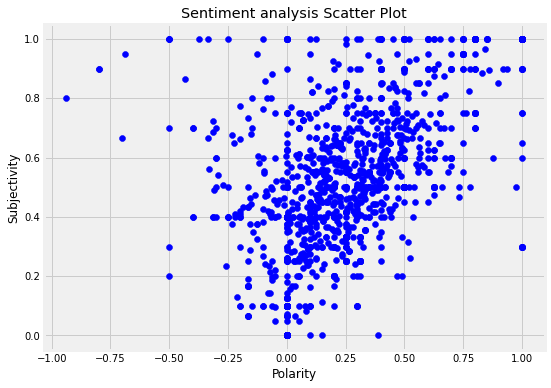

In [39]:
#create a scatter plot to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color ='blue')
plt.title('Sentiment analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

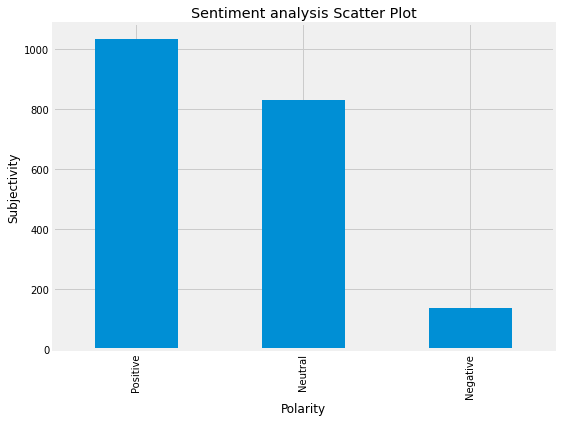

In [43]:
#Create a bar chart to show the count of positive, negative and neutral sentiment in the market
plt.figure(figsize=(8,6))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Cardano Sentiment in the Twitter')
plt.xlabel('Numbers')
plt.ylabel('Sentiments')
plt.show()

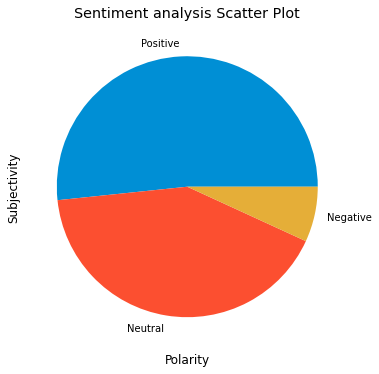

In [42]:
plt.figure(figsize=(8,6))
df['Sentiment'].value_counts().plot(kind='pie')
plt.title('Cardano Sentiment in the Twitter')
plt.xlabel('Numbers')
plt.ylabel('Sentiments')
plt.show()